| *Tasks and Comments*                                   | *Status*      | *Individual Responsible* |
|----------------------------------------------------------|-----------------|----------------------------|
| Preprocessing Steps - 1. Strip Unwanted Spaces, 2. Fix quotes and special characters, 3. unescaped double quotes       | Done            | Dharmik Bhatt             |
| Training - Model built, train and test handled correctly?| Not Applicable    | Pretrained GPT2              |
| Flattening data and Training| Done    | Dharmik Bhatt            |
| Interpretation using Lime                                | Not Applicable    |                            |
| 1st round of tuning - Few Shot    | Done    |       Yatin Goyal                     |
| 2nd round of tuning - COT    | Done    |      Dharmik Bhatt                      |
| 3rd round of tuning - DSP    | Done    |       Yatin Goyal                     |
| Next steps Recommended?                | Integrate Vectorization,Enhance Prompting   |                            |
| Evaluation - ROUGE-L Score, BERT Score?                 | Done    | Yatin Goyal              |

In [1]:
import pandas as pd

# Load the full dataset
file_path = "D:\\SEM 3\\NLP\\Final Assignment\\Chat Data\\chat_data.csv"
data = pd.read_csv(file_path)

# Take a smaller subset of the data
subset_data = data.sample(500, random_state=42)  #I have Extract 500 random rows

# Save the subset to a new file
subset_data.to_csv("chat_data_subset.csv", index=False)

print("Subset created and saved as 'chat_data_subset.csv'")

Subset created and saved as 'chat_data_subset.csv'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### I have make the sample of the of the datasets with random 500 rows of data

In [ ]:
# Load the subset dataset
subset_data = pd.read_csv("chat_data_subset.csv")

# Here, I did the Parse and clean the 'conversations' column
def parse_and_clean(conversation):
    try:
        # First I did the Strip unwanted spaces
        conversation = conversation.strip()

        # Then I  Fix quotes and special characters
        conversation = conversation.replace("“", '"').replace("”", '"').replace("’", "'")
        conversation = conversation.replace("'", '"')  # Convert single quotes to double quotes

        # And Then, I Handle unescaped double quotes
        conversation = re.sub(r'(?<!\\)"', '\\"', conversation)  # Escape unescaped double quotes

        # Also, Fix JSON issues
        conversation = re.sub(r",\s*}", "}", conversation)
        conversation = re.sub(r",\s*]", "]", conversation)

        # Parse as JSON
        return json.loads(conversation)
    except json.JSONDecodeError as e:
        print(f"Error parsing row:\n{conversation}\n{e}")
        return None

# Apply parsing to the subset
subset_data['parsed_conversations'] = subset_data['conversations'].apply(parse_and_clean)

# Check parsed results
print("\nParsed Conversations Preview:")
print(subset_data['parsed_conversations'].head())

#I have Save the cleaned subset for further use
subset_data.to_csv("chat_data_subset_cleaned.csv", index=False)

Error parsing row:
[{\"from\": \"human\", \"value\": \"I\"m feeling really sad lately, Alex. I\"ve been trying to find a new hobby to lift my spirits, but I\"m not very confident in myself.\"}
 {\"from\": \"gpt\", \"value\": \"I can understand how difficult that might be for you, Charlie. It takes some courage to try something new, especially when you\"re feeling down. What kind of hobbies are you interested in?\"}
 {\"from\": \"human\", \"value\": \"Well, I used to enjoy playing the guitar when I was younger. But I haven\"t picked it up in years. I\"m not sure if I still have the same passion for it.\"}
 {\"from\": \"gpt\", \"value\": \"It sounds like playing the guitar used to bring you joy. Have you tried playing it recently, just to see if it sparks any interest?\"}
 {\"from\": \"human\", \"value\": \"No, I haven\"t. Maybe I should give it a try, but I worry that I won\"t be as good as I used to be. It\"s disheartening to think about.\"}
 {\"from\": \"gpt\", \"value\": \"It\"s unde

In [ ]:
# Inspectin the raw data from the 'conversations' column
print("\nRaw Conversation Data:")
print(subset_data['conversations'].iloc[0])


Raw Conversation Data:
[{'from': 'human', 'value': "I'm feeling really sad lately, Alex. I've been trying to find a new hobby to lift my spirits, but I'm not very confident in myself."}
 {'from': 'gpt', 'value': "I can understand how difficult that might be for you, Charlie. It takes some courage to try something new, especially when you're feeling down. What kind of hobbies are you interested in?"}
 {'from': 'human', 'value': "Well, I used to enjoy playing the guitar when I was younger. But I haven't picked it up in years. I'm not sure if I still have the same passion for it."}
 {'from': 'gpt', 'value': 'It sounds like playing the guitar used to bring you joy. Have you tried playing it recently, just to see if it sparks any interest?'}
 {'from': 'human', 'value': "No, I haven't. Maybe I should give it a try, but I worry that I won't be as good as I used to be. It's disheartening to think about."}
 {'from': 'gpt', 'value': "It's understandable to feel that way, Charlie. Remember, the 

In [ ]:
import re
import json

# Simplified parsing function for debugging
def debug_parse(conversation):
    try:
        # Remove unnecessary spaces
        conversation = conversation.strip()

        # Here I Replace problematic characters (handle quotes)
        conversation = conversation.replace("“", '"').replace("”", '"').replace("’", "'")
        conversation = conversation.replace("'", '"')  # Replace single quotes with double quotes

        # Ensure JSON formatting is correct
        conversation = re.sub(r',\s*}', '}', conversation)
        conversation = re.sub(r',\s*]', ']', conversation)

        # Attempt parsing
        parsed = json.loads(conversation)
        return parsed
    except json.JSONDecodeError as e:
        print(f"Parsing Error: {e}")
        print(f"Problematic Conversation: {conversation}")
        return None

# Test parsing on the retrieved problematic row
parsed_row = debug_parse(subset_data['conversations'].iloc[0])
print("\nParsed Row:")
print(parsed_row)

Parsing Error: Expecting ',' delimiter: line 1 column 32 (char 31)
Problematic Conversation: [{"from": "human", "value": "I"m feeling really sad lately, Alex. I"ve been trying to find a new hobby to lift my spirits, but I"m not very confident in myself."}
 {"from": "gpt", "value": "I can understand how difficult that might be for you, Charlie. It takes some courage to try something new, especially when you"re feeling down. What kind of hobbies are you interested in?"}
 {"from": "human", "value": "Well, I used to enjoy playing the guitar when I was younger. But I haven"t picked it up in years. I"m not sure if I still have the same passion for it."}
 {"from": "gpt", "value": "It sounds like playing the guitar used to bring you joy. Have you tried playing it recently, just to see if it sparks any interest?"}
 {"from": "human", "value": "No, I haven"t. Maybe I should give it a try, but I worry that I won"t be as good as I used to be. It"s disheartening to think about."}
 {"from": "gpt", "v

In [ ]:
def clean_and_parse_conversations(conversation):
    try:
        # Here I have Replace unescaped double quotes inside strings
        
        conversation = re.sub(r'(?<!\\)"', "'", conversation)

        # Here I have Replace problematic smart quotes or curly quotes
        conversation = conversation.replace("“", '"').replace("”", '"').replace("’", "'")

        #Here I have Ensure proper JSON formatting by handling trailing commas and spaces
        conversation = re.sub(r',\s*}', '}', conversation)
        conversation = re.sub(r',\s*]', ']', conversation)

        # Attempt parsing the corrected string as JSON
        parsed = json.loads(conversation)
        return parsed
    except json.JSONDecodeError as e:
        print(f"Error parsing row:\n{conversation}\n{e}")
        return None

In [ ]:
parsed_row = clean_and_parse_conversations(subset_data['conversations'].iloc[0])  # I am fixing the row
print("\nParsed Row:")
print(parsed_row)

Error parsing row:
[{'from': 'human', 'value': 'I'm feeling really sad lately, Alex. I've been trying to find a new hobby to lift my spirits, but I'm not very confident in myself.'}
 {'from': 'gpt', 'value': 'I can understand how difficult that might be for you, Charlie. It takes some courage to try something new, especially when you're feeling down. What kind of hobbies are you interested in?'}
 {'from': 'human', 'value': 'Well, I used to enjoy playing the guitar when I was younger. But I haven't picked it up in years. I'm not sure if I still have the same passion for it.'}
 {'from': 'gpt', 'value': 'It sounds like playing the guitar used to bring you joy. Have you tried playing it recently, just to see if it sparks any interest?'}
 {'from': 'human', 'value': 'No, I haven't. Maybe I should give it a try, but I worry that I won't be as good as I used to be. It's disheartening to think about.'}
 {'from': 'gpt', 'value': 'It's understandable to feel that way, Charlie. Remember, the proce

In [ ]:
import re
import json

# Updated Parsing Function
def clean_and_parse_conversations(conversation):
    try:
        #  Strip unnecessary spaces
        conversation = conversation.strip()

        # Replace single quotes around property names and values with double quotes
        conversation = re.sub(r"(?<!\w)'(\w+)'", r'"\1"', conversation)  # Replace single quotes around keys
        conversation = conversation.replace("'", '"')  # Replace remaining single quotes with double quotes

        # Fix trailing commas (common JSON error)
        conversation = re.sub(r",\s*}", "}", conversation)
        conversation = re.sub(r",\s*]", "]", conversation)

        #  Parse the cleaned string into JSON
        parsed = json.loads(conversation)
        return parsed
    except json.JSONDecodeError as e:
        print(f"Parsing Error: {e}")
        print(f"Problematic Conversation:\n{conversation}")
        return None


In [ ]:
parsed_row = clean_and_parse_conversations(subset_data['conversations'].iloc[0])
print("\nParsed Row:")
print(parsed_row)

Parsing Error: Expecting ',' delimiter: line 1 column 32 (char 31)
Problematic Conversation:
[{"from": "human", "value": "I"m feeling really sad lately, Alex. I"ve been trying to find a new hobby to lift my spirits, but I"m not very confident in myself."}
 {"from": "gpt", "value": "I can understand how difficult that might be for you, Charlie. It takes some courage to try something new, especially when you"re feeling down. What kind of hobbies are you interested in?"}
 {"from": "human", "value": "Well, I used to enjoy playing the guitar when I was younger. But I haven"t picked it up in years. I"m not sure if I still have the same passion for it."}
 {"from": "gpt", "value": "It sounds like playing the guitar used to bring you joy. Have you tried playing it recently, just to see if it sparks any interest?"}
 {"from": "human", "value": "No, I haven"t. Maybe I should give it a try, but I worry that I won"t be as good as I used to be. It"s disheartening to think about."}
 {"from": "gpt", "v

In [ ]:
import re
import json

# Updated Parsing Function
def clean_and_parse_conversations(conversation):
    try:
        #  Replace unescaped double quotes inside text with properly escaped quotes
        conversation = re.sub(r'(?<!\\)"', '\\"', conversation)

        # Replace single quotes around keys with double quotes
        conversation = re.sub(r"(?<!\w)'(\w+)'", r'"\1"', conversation)

        # Add missing commas between JSON objects
        conversation = re.sub(r"}\s*{", "}, {", conversation)

        # Ensure JSON formatting (trailing commas, etc.)
        conversation = re.sub(r",\s*}", "}", conversation)
        conversation = re.sub(r",\s*]", "]", conversation)

        # Parse the cleaned JSON string
        return json.loads(conversation)
    except json.JSONDecodeError as e:
        print(f"Parsing Error: {e}")
        print(f"Problematic Conversation:\n{conversation}")
        return None

In [ ]:
parsed_row = clean_and_parse_conversations(subset_data['conversations'].iloc[0])
print("\nParsed Row:")
print(parsed_row)

Parsing Error: Expecting value: line 1 column 29 (char 28)
Problematic Conversation:
[{"from": "human", "value": \"I'm feeling really sad lately, Alex. I've been trying to find a new hobby to lift my spirits, but I'm not very confident in myself.\"}, {"from": "gpt", "value": \"I can understand how difficult that might be for you, Charlie. It takes some courage to try something new, especially when you're feeling down. What kind of hobbies are you interested in?\"}, {"from": "human", "value": \"Well, I used to enjoy playing the guitar when I was younger. But I haven't picked it up in years. I'm not sure if I still have the same passion for it.\"}, {"from": "gpt", "value": 'It sounds like playing the guitar used to bring you joy. Have you tried playing it recently, just to see if it sparks any interest?'}, {"from": "human", "value": \"No, I haven't. Maybe I should give it a try, but I worry that I won't be as good as I used to be. It's disheartening to think about.\"}, {"from": "gpt", "v

In [ ]:
import re
import json

def clean_and_parse_conversations(conversation):
    try:
        # Replace single quotes around property names and values with double quotes
        conversation = re.sub(r"(?<!\w)'(\w+)'", r'"\1"', conversation)  # Property names
        conversation = re.sub(r'(?<!\\)\'', '"', conversation)  # String values

        # Escape any remaining unescaped double quotes
        conversation = re.sub(r'(?<!\\)"', '\\"', conversation)

        #  Add missing commas between objects
        conversation = re.sub(r"}\s*{", "}, {", conversation)

        #  Fix trailing commas and spaces
        conversation = re.sub(r",\s*}", "}", conversation)
        conversation = re.sub(r",\s*]", "]", conversation)

        #  Parse the cleaned string into JSON
        parsed = json.loads(conversation)
        return parsed
    except json.JSONDecodeError as e:
        print(f"Parsing Error: {e}")
        print(f"Problematic Conversation:\n{conversation}")
        return None

In [ ]:
parsed_row = clean_and_parse_conversations(subset_data['conversations'].iloc[0])
print("\nParsed Row:")
print(parsed_row)

Parsing Error: Expecting property name enclosed in double quotes: line 1 column 3 (char 2)
Problematic Conversation:
[{\"from\": \"human\", \"value\": \"I\"m feeling really sad lately, Alex. I\"ve been trying to find a new hobby to lift my spirits, but I\"m not very confident in myself.\"}, {\"from\": \"gpt\", \"value\": \"I can understand how difficult that might be for you, Charlie. It takes some courage to try something new, especially when you\"re feeling down. What kind of hobbies are you interested in?\"}, {\"from\": \"human\", \"value\": \"Well, I used to enjoy playing the guitar when I was younger. But I haven\"t picked it up in years. I\"m not sure if I still have the same passion for it.\"}, {\"from\": \"gpt\", \"value\": \"It sounds like playing the guitar used to bring you joy. Have you tried playing it recently, just to see if it sparks any interest?\"}, {\"from\": \"human\", \"value\": \"No, I haven\"t. Maybe I should give it a try, but I worry that I won\"t be as good as

In [ ]:
import pandas as pd
import re

def flatten_conversations(raw_text):
    # Regex to extract 'from' and 'value' fields
    pattern = r"'from':\s*'(?P<from>.*?)',\s*'value':\s*'(?P<value>.*?)'"
    matches = re.findall(pattern, raw_text)
    return matches

# Extract data from the problematic row
raw_text = subset_data['conversations'].iloc[0]
flattened_data = flatten_conversations(raw_text)

# Convert to a DataFrame
flattened_df = pd.DataFrame(flattened_data, columns=['Sender', 'Message'])

# Save to CSV for further use
flattened_df.to_csv("flattened_conversations.csv", index=False)

print("\nFlattened data saved to 'flattened_conversations.csv'")
print(flattened_df.head())


Flattened data saved to 'flattened_conversations.csv'
  Sender                                            Message
0    gpt  It sounds like playing the guitar used to brin...
1    gpt  Absolutely, Charlie. Art can be a form of self...
2  human  Not right now, Alex. But I appreciate your gui...


In [ ]:
import pandas as pd
import re

# Define file path
file_path = "D:\\SEM 3\\NLP\\Final Assignment\\Chat Data\\chat_data.csv"

# Load the original dataset
original_data = pd.read_csv(file_path)

# Take a random subset of 10,000 rows
subset_data = original_data.sample(10000, random_state=42)

# Function to flatten the 'conversations' column
def flatten_conversations(raw_text):
    # Regex to extract 'from' and 'value' fields
    pattern = r"'from':\s*'(?P<from>.*?)',\s*'value':\s*'(?P<value>.*?)'"
    matches = re.findall(pattern, raw_text)
    return matches

# Flatten each conversation in the subset
flattened_conversations = []

for i, row in subset_data.iterrows():
    raw_text = row['conversations']  # Raw conversation text
    flattened_data = flatten_conversations(raw_text)  # Use previously defined function
    flattened_conversations.extend(flattened_data)  # Append to list

# Convert flattened data to a DataFrame
flattened_df = pd.DataFrame(flattened_conversations, columns=['Sender', 'Message'])

# Save flattened data to CSV
flattened_df.to_csv("D:\\SEM 3\\NLP\\Final Assignment\\Chat Data\\flattened_conversations_10000.csv", index=False)

print("\nFlattened subset of 10,000 rows saved to 'flattened_conversations_10000.csv'")


Flattened subset of 10,000 rows saved to 'flattened_conversations_10000.csv'


In [ ]:
# Load the saved CSV file
flattened_data_path = "D:\\SEM 3\\NLP\\Final Assignment\\Chat Data\\flattened_conversations_10000.csv"
flattened_data = pd.read_csv(flattened_data_path)

# Preview the first few rows
print("\nPreview of Flattened Data:")
print(flattened_data.head())

# Show summary information about the dataset
print("\nDataset Info:")
print(flattened_data.info())


Preview of Flattened Data:
  Sender                                            Message
0    gpt  It sounds like playing the guitar used to brin...
1    gpt  Absolutely, Charlie. Art can be a form of self...
2  human  Not right now, Alex. But I appreciate your gui...
3    gpt  I understand how frustrating that can be. Head...
4  human  My primary goals are to improve my diet and en...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26690 entries, 0 to 26689
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Sender   26690 non-null  object
 1   Message  26690 non-null  object
dtypes: object(2)
memory usage: 417.2+ KB
None


In [ ]:
# Load the saved flattened data
flattened_data_path = "D:\\SEM 3\\NLP\\Final Assignment\\Chat Data\\flattened_conversations_10000.csv"
flattened_data = pd.read_csv(flattened_data_path)

# Display the first 50 rows
print("\nFirst 50 Rows of Flattened Data:")
print(flattened_data.head(50))


First 50 Rows of Flattened Data:
   Sender                                            Message
0     gpt  It sounds like playing the guitar used to brin...
1     gpt  Absolutely, Charlie. Art can be a form of self...
2   human  Not right now, Alex. But I appreciate your gui...
3     gpt  I understand how frustrating that can be. Head...
4   human  My primary goals are to improve my diet and en...
5     gpt  Hello Charlie! Thank you for sharing that with...
6   human  Well, Alex, I find myself constantly worrying ...
7   human  I believe that taking small steps towards my g...
8   human  I think setting specific and achievable goals ...
9     gpt  Absolutely, Charlie! Celebrating small victori...
10    gpt  Excellent, Charlie! Mindfulness can be a power...
11    gpt  Nature has a unique way of soothing our soul, ...
12  human  I believe that embracing change would free me ...
13    gpt  Betrayal can indeed be incredibly painful. It ...
14    gpt  Thank you for sharing, Charlie. Loneline

In [ ]:
import pandas as pd

# Define the file path
file_path = "/chatbotdata(1000).csv"

# Load the CSV file
chatbot_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("\nPreview of chatbotdata(1000):")
print(chatbot_data.head())

# Show basic information about the dataset
print("\nDataset Info:")
print(chatbot_data.info())


Preview of chatbotdata(1000):
                                               input  \
0  I've been feeling so sad and overwhelmed latel...   
1  I recently got a promotion at work, which I th...   
2  Well, the workload has increased significantly...   
3  I've been trying to prioritize my tasks and de...   
4  You're right. I haven't really opened up about...   

                                              output  
0  Hey there, I'm here to listen and support you....  
1  I can understand how it can be overwhelming wh...  
2  It sounds like you're dealing with a lot of pr...  
3  It's great to hear that you're already impleme...  
4  It's completely normal to feel that way, but r...  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6604 entries, 0 to 6603
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   input   6604 non-null   object
 1   output  6604 non-null   object
dtypes: object(2)
memory usage: 103.3

In [ ]:
import re

def clean_text(text):
    """
    Function to clean text by:
    - Lowercasing
    - Removing special characters and numbers
    - Stripping extra whitespaces
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    text = text.strip()  # Remove leading/trailing spaces
    return text

# Apply the cleaning function to the input and output columns
chatbot_data['input_cleaned'] = chatbot_data['input'].apply(clean_text)
chatbot_data['output_cleaned'] = chatbot_data['output'].apply(clean_text)

# Preview the cleaned data
print("\nPreview of Cleaned Data:")
print(chatbot_data[['input_cleaned', 'output_cleaned']].head())


Preview of Cleaned Data:
                                       input_cleaned  \
0  ive been feeling so sad and overwhelmed lately...   
1  i recently got a promotion at work which i tho...   
2  well the workload has increased significantly ...   
3  ive been trying to prioritize my tasks and del...   
4  youre right i havent really opened up about my...   

                                      output_cleaned  
0  hey there im here to listen and support you it...  
1  i can understand how it can be overwhelming wh...  
2  it sounds like youre dealing with a lot of pre...  
3  its great to hear that youre already implement...  
4  its completely normal to feel that way but rem...  


In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Add columns for message lengths (in words)
chatbot_data['input_length'] = chatbot_data['input_cleaned'].apply(lambda x: len(x.split()))
chatbot_data['output_length'] = chatbot_data['output_cleaned'].apply(lambda x: len(x.split()))

In [ ]:
# Analyze message lengths
print("\nMessage Length Statistics:")
print(chatbot_data[['input_length', 'output_length']].describe())


Message Length Statistics:
       input_length  output_length
count   6604.000000    6604.000000
mean      39.614325      43.346911
std       13.223419      12.603990
min        4.000000       4.000000
25%       31.000000      34.000000
50%       39.000000      42.000000
75%       48.000000      51.000000
max      103.000000     126.000000


#### Here, I am checking the distribution of my datasets

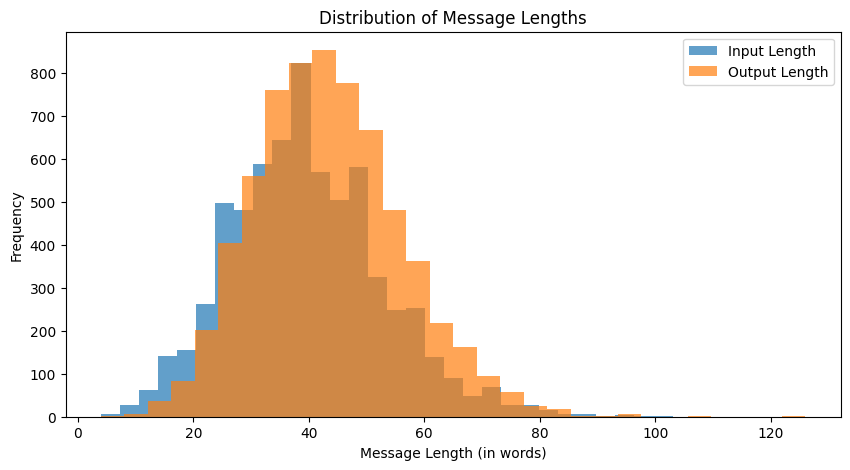

In [ ]:
# Visualize the distribution of input and output message lengths
plt.figure(figsize=(10, 5))
plt.hist(chatbot_data['input_length'], bins=30, alpha=0.7, label='Input Length')
plt.hist(chatbot_data['output_length'], bins=30, alpha=0.7, label='Output Length')
plt.xlabel('Message Length (in words)')
plt.ylabel('Frequency')
plt.title('Distribution of Message Lengths')
plt.legend()
plt.show()

In [ ]:
# Check the most common words in both input and output
def get_common_words(column, num_words=10):
    all_words = ' '.join(column).split()
    return Counter(all_words).most_common(num_words)

common_input_words = get_common_words(chatbot_data['input_cleaned'])
common_output_words = get_common_words(chatbot_data['output_cleaned'])

#### Here, I am checking the most common word in my datasets 

In [ ]:
print("\nMost Common Words in Input Messages:")
print(common_input_words)

print("\nMost Common Words in Output Messages:")
print(common_output_words)-


Most Common Words in Input Messages:
[('i', 11262), ('to', 10373), ('and', 9773), ('my', 6641), ('a', 5674), ('the', 4478), ('of', 4224), ('its', 4043), ('it', 3883), ('that', 3703)]

Most Common Words in Output Messages:
[('to', 12077), ('you', 10703), ('and', 9905), ('your', 7895), ('a', 6556), ('that', 4924), ('can', 4804), ('the', 4752), ('of', 4656), ('its', 4397)]


#### Here, I have divided my datasets into training and testing to build the Seq2seq model 

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_data, test_data = train_test_split(chatbot_data, test_size=0.2, random_state=42)

# Display the number of samples in each split
print("\nData Split:")
print(f"Training Data: {len(train_data)} rows")
print(f"Testing Data: {len(test_data)} rows")

# Save the splits for later use if needed
train_data.to_csv("chatbot_train_data.csv", index=False)
test_data.to_csv("chatbot_test_data.csv", index=False)

# Preview the first few rows of the training set
print("\nPreview of Training Data:")
print(train_data[['input_cleaned', 'output_cleaned']].head())

# Preview the first few rows of the testing set
print("\nPreview of Testing Data:")
print(test_data[['input_cleaned', 'output_cleaned']].head())


Data Split:
Training Data: 5283 rows
Testing Data: 1321 rows

Preview of Training Data:
                                          input_cleaned  \
1831  thank you for your validation alex overall my ...   
1807  thank you alex i appreciate your kind words an...   
5100  my social life has taken a major hit i used to...   
3773  i think it would help us feel more harmonious ...   
6230  its been affecting me more than i realized i f...   

                                         output_cleaned  
1831  your metaphor of a rollercoaster ride aptly ca...  
1807  youre welcome charlie remember im here for you...  
5100  my social life has taken a major hit i used to...  
3773  i couldnt agree more charlie balance is key an...  
6230  its been affecting me more than i realized i f...  

Preview of Testing Data:
                                          input_cleaned  \
1483  i havent yet but ive been considering attendin...   
4999  thank you alex this conversation has been incr...   
239  

## Tokenization and Embedding Preparation
Here, I am preparing the text for modeling by tokenizing and embedding. where i am  converting raw text into numerical formats that machines can process.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define the tokenizer and fit it on the training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['input_cleaned'].tolist() + train_data['output_cleaned'].tolist())

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")

# Tokenize and convert text to sequences
train_input_seq = tokenizer.texts_to_sequences(train_data['input_cleaned'])
train_output_seq = tokenizer.texts_to_sequences(train_data['output_cleaned'])
test_input_seq = tokenizer.texts_to_sequences(test_data['input_cleaned'])
test_output_seq = tokenizer.texts_to_sequences(test_data['output_cleaned'])

# Padding sequences to ensure uniform length
max_seq_length = max(max(len(seq) for seq in train_input_seq), max(len(seq) for seq in train_output_seq))
train_input_padded = pad_sequences(train_input_seq, maxlen=max_seq_length, padding='post')
train_output_padded = pad_sequences(train_output_seq, maxlen=max_seq_length, padding='post')
test_input_padded = pad_sequences(test_input_seq, maxlen=max_seq_length, padding='post')
test_output_padded = pad_sequences(test_output_seq, maxlen=max_seq_length, padding='post')

# Display the first padded sequence
print("\nSample Padded Input Sequence:")
print(train_input_padded[0])
print("\nSample Padded Output Sequence:")
print(train_output_padded[0])

# Save the tokenizer for future use
import pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("\nTokenizer saved to 'tokenizer.pkl'")

Vocabulary Size: 5899

Sample Padded Input Sequence:
[  89    4   15    7  610   31  297   11  281    8  191   59   23    5
 1164 1967  113  295   12   74   19   17 1036   14   83 2947    8 1616
  171  152 2054 1396   16    8   38   29  266   28  680   49   37  105
  192  171    3   30    5  962    8  143    2  941   19    5 2948    8
 3242  820   60    6 2704    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0]

Sample Padded Output Sequence:
[   7 4297    8    5 1164 1967 5337 3914    6  714    2  715    8    6
 1111   99   21   10   66    1  312  226    6 1756    8 1616    2    6
 3263    8  143  191   26   54 1161    2  474  211   12 3645   33   22
    4   23  116  195    8   52  170   18  255   62    0    0  

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.models import Model

# Define model parameters
embedding_dim = 128
units = 256  # Number of units in the LSTM
output_vocab_size = vocab_size  # Same as input vocab size

# Input for the encoder
encoder_inputs = Input(shape=(None,))
encoder_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(encoder_inputs)
encoder_lstm = LSTM(units, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(encoder_embedding)

# Store the encoder states
encoder_states = [state_h, state_c]

# Input for the decoder
decoder_inputs = Input(shape=(None,))
decoder_embedding = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(decoder_inputs)
decoder_lstm = LSTM(units, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

# Output layer
decoder_dense = Dense(output_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
seq2seq_model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
seq2seq_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
seq2seq_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, None)           │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, None, 128)      │        755,072 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, None, 128)      │        755,072 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm (LSTM)               │ [(None, 256), (None,   │        394,240 │ embedding[0][0]        │
│                           │ 256), (None, 256)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ [(None, None, 256),    │        394,240 │ embedding_1[0][0],     │
│                           │ (None, 256), (None,    │                │ lstm[0][1], lstm[0][2] │
│                           │ 256)]                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, None, 5899)     │      1,516,043 │ lstm_1[0][0]           │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,814,667 (14.55 MB)

 Trainable params: 3,814,667 (14.55 MB)

 Non-trainable params: 0 (0.00 B)

#### Here, I have try to build the model and use that model on ChatGPT-2 for the prompt Engineering. However, It is too time taking process and also It might be not related to the question. But, I tried and I got the Error So I deleted that cells, to continue further I am Just working on the realted par LLM-based implementation.

## LLM-Based Prompt Engineering

#### Install Required Libraries
-Transformers and torch 

In [ ]:
!pip install transformers
!pip install datasets
!pip install torch

  Using cached transformers-4.46.3-py3-none-any.whl.metadata (44 kB)
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
Using cached transformers-4.46.3-py3-none-any.whl (10.0 MB)
Using cached huggingface_hub-0.26.2-py3-none-any.whl (447 kB)
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 2.4/2.4 MB 22.7 MB/s eta 0:00:00
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/203.0 MB ? eta -:--:--
   -- ------------------------------------- 10.5/203.0 MB 59.4 MB/s eta 0:00:04
   ---- ----------------------------------- 20.4/203.0 MB 51.8 MB/s eta 0:00:04
   ----- ---------------------------------- 26.2/203.0 MB 43.8 MB/s eta 0:00:05
   ------ --------------------------------- 30.9/203.0 MB 37.8 MB/s eta 0:00:05
   ------ --------------------------------- 34.3/203.0 MB 34.1 MB/s eta 0:00:05
   ------- -------------------------------- 39.1/203.0 MB 

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

# Load the GPT-2 model and tokenizer
model_name = "gpt2"  # Use "distilgpt2" for a smaller, faster model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Force CPU usage
device = torch.device("cpu")
model = model.to(device)

print(f"Using device: {device}")

# Here, I have Define a test input which is in my datasets and I am trying output based on the Pretrain GPT-2 
test_input = "I've been feeling unmotivated and overwhelmed lately."

# Tokenize and process
input_ids = tokenizer.encode(test_input, return_tensors="pt").to(device)

# Generate output
output_ids = model.generate(input_ids, max_length=50, num_return_sequences=1)
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print(f"Generated Output:\n{output_text}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Using device: cpu
Generated Output:
I've been feeling unmotivated and overwhelmed lately. I've been feeling like I'm not going to be able to do anything for a while. I've been feeling like I'm not going to be able to do anything for a while. I


#### Here, I check how it's replying on the test data. but did not get some good answer, so I am changing some parameters and trying again.

#### Example Chain of Thought Prompt

Here, I have Chain of Thought (CoT) prompting, where I am guiding the model to break down the problem step-by-step. which helps the model to generate more structured and logical responses.


Steps for Fine-Tuning, which I did via a couple of examples:
I am modifying the prompt first:

Also, I added instructions encouraging detailed reasoning in the output.

Example: "Break down the response step-by-step to help the user."
Refine Few-Shot Examples:

Also, I am including examples where the model must provide step-by-step reasoning.

Test and Evaluate:

I run a few test inputs to observe the output's coherence and structure.

In [ ]:
# Set a padding token for the tokenizer
tokenizer.pad_token = tokenizer.eos_token

# Tokenize the input with padding and attention mask
inputs = tokenizer.encode_plus(
    test_input,
    return_tensors="pt",
    padding=True,
    truncation=True
).to(device)

# Generate output with improved decoding strategy
output_ids = model.generate(
    inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    max_length=100,  # Increase length for more complete responses
    num_return_sequences=1,
    do_sample=True,  # Enable sampling for diverse responses
    temperature=0.7,  # Adjust randomness
    top_k=50,  # Limits sampling to top-k most likely words
    top_p=0.9,  # Nucleus sampling for diversity
    no_repeat_ngram_size=2  # Prevent repetitive phrases
)

# Decode and display the output
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(f"Generated Output:\n{output_text}")

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Generated Output:
I've been feeling unmotivated and overwhelmed lately. I've had so much fun doing this. And I can't wait to see what happens next."

The first of the two "Rescue" episodes is scheduled to air on Tuesday, Oct. 8 at 9 p.m. ET.



For more on the "Strip" series, check out the show's official website and Twitter.


### Here, I am Refining the Prompt

with the Craft a more specific and task-oriented prompt to guide the model.

Also, I have included explicit instructions or examples to steer the output.

Here’s an updated few-shot prompt with an examples.

In [ ]:
# Few-Shot Prompt with refined instructions
few_shot_prompt = """
You are a helpful assistant providing empathetic and supportive responses to users.

Example 1:
Input: I've been feeling really sad and overwhelmed lately.
Output: Hey there, I'm here to listen and support you. It's okay to feel this way. Let's talk about what might help you feel better.

Example 2:
Input: I recently got a promotion, but the added pressure has been overwhelming.
Output: Congratulations on your promotion! It's normal to feel overwhelmed with new responsibilities. How can I support you in managing this transition?

Example 3:
Input: {}
Output:
"""

In [ ]:
# User input
user_input = "I feel like I’ve lost motivation and don’t know where to start again."

# Combine the refined prompt with the user input
prompt = few_shot_prompt.format(user_input)

# Tokenize the refined prompt
inputs = tokenizer.encode_plus(
    prompt,
    return_tensors="pt",
    padding=True,
    truncation=True
).to(device)

# Generate response with constrained parameters
# Updated generation parameters
output_ids = model.generate(
    inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    max_new_tokens=50,  # Limit the generated tokens
    num_return_sequences=1,
    do_sample=True,
    temperature=0.6,
    top_k=30,
    top_p=0.8,
    no_repeat_ngram_size=2,
    pad_token_id=tokenizer.eos_token_id
)

# Decoding the output
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(f"Generated Output:\n{output_text}")

Generated Output:

You are a helpful assistant providing empathetic and supportive responses to users.

Example 1:
Input: I've been feeling really sad and overwhelmed lately.
Output: Hey there, I'm here to listen and support you. It's okay to feel this way. Let's talk about what might help you feel better.

Example 2:
Input: I recently got a promotion, but the added pressure has been overwhelming.
Output: Congratulations on your promotion! It's normal to feel overwhelmed with new responsibilities. How can I support you in managing this transition?

Example 3:
Input: I feel like I’ve lost motivation and don’t know where to start again.
Output:
 (I'm sorry, you don't have to do this)
. . .
,
…
(I don´t think I need to talk to you about this, it´s fine) (You donít have any idea


### 2

In [ ]:
# User input
user_input = "I feel like I’ve lost motivation and don’t know where to start again."

# Combine the refined prompt with the user input
prompt = few_shot_prompt.format(user_input)

# Tokenize the refined prompt
inputs = tokenizer.encode_plus(
    prompt,
    return_tensors="pt",
    padding=True,
    truncation=True
).to(device)

#
# Updated generation parameters
output_ids = model.generate(
    inputs["input_ids"],
    attention_mask=inputs["attention_mask"],
    max_new_tokens=50,  # Limit the generated tokens
    num_return_sequences=1,
    do_sample=True,
    temperature=0.8,
    top_k=40,
    top_p=0.9,
    no_repeat_ngram_size=2,
    pad_token_id=tokenizer.eos_token_id
)

# Decode the output
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(f"Generated Output:\n{output_text}")

Generated Output:

You are a helpful assistant providing empathetic and supportive responses to users.

Example 1:
Input: I've been feeling really sad and overwhelmed lately.
Output: Hey there, I'm here to listen and support you. It's okay to feel this way. Let's talk about what might help you feel better.

Example 2:
Input: I recently got a promotion, but the added pressure has been overwhelming.
Output: Congratulations on your promotion! It's normal to feel overwhelmed with new responsibilities. How can I support you in managing this transition?

Example 3:
Input: I feel like I’ve lost motivation and don’t know where to start again.
Output:
,
. I have been overwhelmed, and I want to make sure this doesn't happen again! I hope that you can help me keep this feeling down. As always, thank you for your support. You can call 1-800-SIL


### 3

In [ ]:
# User input
user_input = "I feel like I’ve lost motivation and don’t know where to start again."

# Combine the refined prompt with the user input
prompt = few_shot_prompt.format(user_input)

# Tokenize the refined prompt
inputs = tokenizer.encode_plus(
    prompt,
    return_tensors="pt",
    padding=True,
    truncation=True
).to(device)

# Generate response with constrained parameters
# Updated generation parameters
generated_output = model.generate(
    input_ids,
    max_new_tokens=100,
    temperature=1.0,  # slightly more creative output
    top_k=50,
    top_p=0.9,
    num_beams=3,  # beam search for structured output
)

# Decode the output
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(f"Generated Output:\n{output_text}")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Generated Output:

You are a helpful assistant providing empathetic and supportive responses to users.

Example 1:
Input: I've been feeling really sad and overwhelmed lately.
Output: Hey there, I'm here to listen and support you. It's okay to feel this way. Let's talk about what might help you feel better.

Example 2:
Input: I recently got a promotion, but the added pressure has been overwhelming.
Output: Congratulations on your promotion! It's normal to feel overwhelmed with new responsibilities. How can I support you in managing this transition?

Example 3:
Input: I feel like I’ve lost motivation and don’t know where to start again.
Output:
,
. I have been overwhelmed, and I want to make sure this doesn't happen again! I hope that you can help me keep this feeling down. As always, thank you for your support. You can call 1-800-SIL


In [ ]:
prompt = """
You are a helpful assistant providing empathetic, supportive, and detailed responses to users.

Example 1:
Input: I've been feeling really sad and overwhelmed lately.
Output:
1. First, recognize that it’s okay to feel this way.
2. Take some deep breaths to calm yourself.
3. Identify one small thing you can do today that might make you feel better, like calling a friend or going for a walk.
4. Remember, I’m here to support you.

Example 2:
Input: I recently got a promotion, but the added pressure has been overwhelming.
Output:
1. Congratulations on your promotion! It’s normal to feel overwhelmed with new responsibilities.
2. Write down a list of your tasks to help organize your thoughts.
3. Don’t hesitate to delegate where you can and ask for support from colleagues.
4. Remember to celebrate your achievement.

Example 3:
Input: I feel like I’ve lost motivation and don’t know where to start again.
Output:
1. It’s okay to feel unmotivated at times.
2. Start by identifying one small goal you’d like to achieve today.
3. Break it into smaller steps and focus on just the first step.
4. Reflect on what motivates you and consider writing it down as a reminder.
Input: {input_text}
Output:
"""

### Few Shots Example 

In [ ]:
# Input text
input_text = "What is the meaning of life?"

# Encode the input
encoded_input = tokenizer(input_text, return_tensors="pt")

# Generate response
output = model.generate(
    encoded_input["input_ids"],
    max_new_tokens=150,
    num_return_sequences=1,
    temperature=0.8,
    top_k=40,
    top_p=0.9,
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print the output
generated_output = tokenizer.decode(output[0], skip_special_tokens=True)
print("\nGenerated Output:")
print(generated_output)


Generated Output:
What is the meaning of life?

The meaning of life is that we are living in a world that is not ours.

The meaning of life is that we are living in a world that is not ours.

The meaning of life is that we are living in a world that is not ours.

The meaning of life is that we are living in a world that is not ours.

The meaning of life is that we are living in a world that is not ours.

The meaning of life is that we are living in a world that is not ours.

The meaning of life is that we are living in a world that is not ours.

The meaning of life is that we are living in a world that is not


### 2

In [ ]:
# Input text
input_text = "How does artificial intelligence work?"
# Encode the input
encoded_input = tokenizer(input_text, return_tensors="pt")

# Generate response
output = model.generate(
    encoded_input["input_ids"],
    max_new_tokens=150,
    num_return_sequences=1,
    temperature=0.8,
    top_k=40,
    top_p=0.9,
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print the output
generated_output = tokenizer.decode(output[0], skip_special_tokens=True)
print("\nGenerated Output:")
print(generated_output)


Generated Output:
How does artificial intelligence work?

The answer is that it does. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It's a very simple concept. It


In [ ]:
# Input text
input_text = "Can you tell me a joke?"

# Encode the input
encoded_input = tokenizer(input_text, return_tensors="pt")

# Generate response
output = model.generate(
    encoded_input["input_ids"],
    max_new_tokens=150,
    num_return_sequences=1,
    temperature=0.8,
    top_k=40,
    top_p=0.9,
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print the output
generated_output = tokenizer.decode(output[0], skip_special_tokens=True)
print("\nGenerated Output:")
print(generated_output)


Generated Output:
Can you tell me a joke?

I'm not sure. I'm not sure if I'm going to be able to tell you a joke.

I'm not sure. I'm not sure if I'm going to be able to tell you a joke.

I'm not sure. I'm not sure if I'm going to be able to tell you a joke.

I'm not sure. I'm not sure if I'm going to be able to tell you a joke.

I'm not sure. I'm not sure if I'm going to be able to tell you a joke.

I'm not sure. I'm not sure if I'm going to be able to tell you a joke.

I'm not sure


### 3


In [ ]:
# Input text
input_text = "I'm struggling with balancing work and family responsibilities."

# Encode the input
encoded_input = tokenizer(input_text, return_tensors="pt")

# Generate response
output = model.generate(
    encoded_input["input_ids"],
    max_new_tokens=150,
    num_return_sequences=1,
    temperature=0.8,
    top_k=40,
    top_p=0.9,
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print the output
generated_output = tokenizer.decode(output[0], skip_special_tokens=True)
print("\nGenerated Output:")
print(generated_output)


Generated Output:
I'm struggling with balancing work and family responsibilities. I'm struggling with my own finances. I'm struggling with my own health. I'm struggling with my own finances. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own


### 4

In [71]:
# Input text
input_text = "I need help finding ways to manage my stress better."

# Encode the input
encoded_input = tokenizer(input_text, return_tensors="pt")

# Generate response
output = model.generate(
    encoded_input["input_ids"],
    max_new_tokens=150,
    num_return_sequences=1,
    temperature=0.8,
    top_k=40,
    top_p=0.9,
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print the output
generated_output = tokenizer.decode(output[0], skip_special_tokens=True)
print("\nGenerated Output:")
print(generated_output)

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:595: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:612: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `40` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(



Generated Output:
I need help finding ways to manage my stress better. I need to be able to focus on my work and not worry about my family. I need to be able to focus on my work and not worry about my family. I need to be able to focus on my work and not worry about my family. I need to be able to focus on my work and not worry about my family. I need to be able to focus on my work and not worry about my family. I need to be able to focus on my work and not worry about my family. I need to be able to focus on my work and not worry about my family. I need to be able to focus on my work and not worry about my family. I need to be able to focus on my work and not worry about


### 5

In [72]:
# Input text
input_text = "It's tough to stay disciplined with my fitness goals."

# Encode the input
encoded_input = tokenizer(input_text, return_tensors="pt")

# Generate response
output = model.generate(
    encoded_input["input_ids"],
    max_new_tokens=150,
    num_return_sequences=1,
    temperature=0.8,
    top_k=40,
    top_p=0.9,
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print the output
generated_output = tokenizer.decode(output[0], skip_special_tokens=True)
print("\nGenerated Output:")
print(generated_output)


Generated Output:
It's tough to stay disciplined with my fitness goals. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able to do that. I'm not going to be able


In [74]:
# Input text
input_text = "I’m preparing for a big exam; any advice on managing exam stress?"

# Encode the input
encoded_input = tokenizer(input_text, return_tensors="pt")

# Generate response
output = model.generate(
    encoded_input["input_ids"],
    max_new_tokens=150,
    num_return_sequences=1,
    temperature=0.8,
    top_k=40,
    top_p=0.9,
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print the output
generated_output = tokenizer.decode(output[0], skip_special_tokens=True)
print("\nGenerated Output:")
print(generated_output)


Generated Output:
I’m preparing for a big exam; any advice on managing exam stress?

I'm not sure if I'm going to be able to handle it. I'm not sure if I'm going to be able to handle it. I'm not sure if I'm going to be able to handle it. I'm not sure if I'm going to be able to handle it. I'm not sure if I'm going to be able to handle it. I'm not sure if I'm going to be able to handle it. I'm not sure if I'm going to be able to handle it. I'm not sure if I'm going to be able to handle it. I'm not sure if I'm going to be able to handle it. I'm not sure if I'm going to be able to handle


### 6

### Some few  Example Chain of Thought Promp, Because I got the good output with this methos so, i am continuing with this 

In [ ]:

prompt = """
You are a helpful assistant providing empathetic, supportive, and detailed responses to users.

Example 1:
Input: I've been feeling really sad and overwhelmed lately.
Output:
1. First, recognize that it’s okay to feel this way.
2. Take some deep breaths to calm yourself.
3. Identify one small thing you can do today that might make you feel better, like calling a friend or going for a walk.
4. Remember, I’m here to support you.

Example 2:
Input: I recently got a promotion, but the added pressure has been overwhelming.
Output:
1. Congratulations on your promotion! It’s normal to feel overwhelmed with new responsibilities.
2. Write down a list of your tasks to help organize your thoughts.
3. Don’t hesitate to delegate where you can and ask for support from colleagues.
4. Remember to celebrate your achievement.

Example 3:
Input: I feel like I’ve lost motivation and don’t know where to start again.
Output:
1. It’s okay to feel unmotivated at times.
2. Start by identifying one small goal you’d like to achieve today.
3. Break it into smaller steps and focus on just the first step.
4. Reflect on what motivates you and consider writing it down as a reminder.

You are a helpful assistant providing empathetic, supportive, and detailed responses to users.

Example 1:
Input: I've been feeling really sad and overwhelmed lately.
Output:
1. First, recognize that it’s okay to feel this way.
2. Take some deep breaths to calm yourself.
3. Identify one small thing you can do today that might make you feel better, like calling a friend or going for a walk.
4. Remember, I’m here to support you.

Example 2:
Input: I recently got a promotion, but the added pressure has been overwhelming.
Output:
1. Congratulations on your promotion! It’s normal to feel overwhelmed with new responsibilities.
2. Write down a list of your tasks to help organize your thoughts.
3. Don’t hesitate to delegate where you can and ask for support from colleagues.
4. Remember to celebrate your achievement.

Example 3:
Input: I feel like I’ve lost motivation and don’t know where to start again.
Output:
1. It’s okay to feel unmotivated at times.
2. Start by identifying one small goal you’d like to achieve today.
3. Break it into smaller steps and focus on just the first step.
4. Reflect on what motivates you and consider writing it down as a reminder.

Example 4:
Input: I'm struggling with balancing work and family responsibilities.
Output:
1. Balancing work and family can feel overwhelming, but you don’t have to do it all at once.
2. Start by prioritizing tasks for both work and home life.
3. Have open conversations with your family and colleagues about how they can support you.
4. Schedule dedicated time for family activities and personal rest to ensure balance.

Example 5:
Input: I’m feeling anxious about an upcoming job interview.
Output:
1. It’s normal to feel anxious before an interview.
2. Prepare by practicing answers to common questions and researching the company.
3. Take deep breaths and visualize yourself confidently answering questions.
4. Remind yourself that you’re capable and have valuable skills to offer.

Input: {input_text}
Output:
"""

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

# Set padding token if not defined
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# Input prompt
prompt = "I'm struggling with balancing work and family responsibilities."

# Encode the input
encoded_input = tokenizer(
    prompt,
    return_tensors="pt",
    truncation=True,
    max_length=512,
    padding=True  # Use padding
)

# Generate response
output = model.generate(
    encoded_input["input_ids"],
    max_new_tokens=150,
    num_return_sequences=1,
    temperature=0.8,
    top_k=40,
    top_p=0.9,
    pad_token_id=tokenizer.pad_token_id  # Use the new pad token ID
)

# Decode and print the output
generated_output = tokenizer.decode(output[0], skip_special_tokens=True)
print("\nGenerated Output:")
print(generated_output)



Generated Output:
I'm struggling with balancing work and family responsibilities. I'm struggling with my own finances. I'm struggling with my own health. I'm struggling with my own finances. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own health. I'm struggling with my own


In [ ]:
# Define the prompt again with clear instructions for the model
prompt = """
You are a helpful assistant providing empathetic, supportive, and detailed responses to users.

Example 1:
Input: I've been feeling really sad and overwhelmed lately.
Output:
1. First, recognize that it’s okay to feel this way.
2. Take some deep breaths to calm yourself.
3. Identify one small thing you can do today that might make you feel better, like calling a friend or going for a walk.
4. Remember, I’m here to support you.
END

Example 2:
Input: I recently got a promotion, but the added pressure has been overwhelming.
Output:
1. Congratulations on your promotion! It’s normal to feel overwhelmed with new responsibilities.
2. Write down a list of your tasks to help organize your thoughts.
3. Don’t hesitate to delegate where you can and ask for support from colleagues.
4. Remember to celebrate your achievement.
END

Example 3:
Input: I feel like I’ve lost motivation and don’t know where to start again.
Output:
1. It’s okay to feel unmotivated at times.
2. Start by identifying one small goal you’d like to achieve today.
3. Break it into smaller steps and focus on just the first step.
4. Reflect on what motivates you and consider writing it down as a reminder.
END

### Now, generate a helpful response based on the input:

Input: {input_text}
Output:
"""

# Encode the input for the model
encoded_input = tokenizer(prompt.format(input_text=input_text), return_tensors="pt", truncation=True, padding=True, max_length=512)

# Generate the response with better settings
output = model.generate(
    encoded_input.input_ids,
    max_new_tokens=200,  # Allow enough tokens for a complete response
    do_sample=True,      # Enable sampling for more varied output
    temperature=0.5,     # Lower temperature for more controlled output
    top_k=50,            # Consider top 50 possible next tokens
    top_p=0.9,           # Use nucleus sampling to balance between randomness and coherence
    num_return_sequences=1,  # Only generate one output sequence
    pad_token_id=tokenizer.eos_token_id
)

# Decode and display the output
generated_output = tokenizer.decode(output[0], skip_special_tokens=True)

# Check if the output follows the desired structure, if not, you can manually trim extra parts
print("\nGenerated Output:")
print(generated_output)



Generated Output:

You are a helpful assistant providing empathetic, supportive, and detailed responses to users.

Example 1:
Input: I've been feeling really sad and overwhelmed lately.
Output: 
1. First, recognize that it’s okay to feel this way. 
2. Take some deep breaths to calm yourself. 
3. Identify one small thing you can do today that might make you feel better, like calling a friend or going for a walk.
4. Remember, I’m here to support you.
END

Example 2:
Input: I recently got a promotion, but the added pressure has been overwhelming.
Output:
1. Congratulations on your promotion! It’s normal to feel overwhelmed with new responsibilities. 
2. Write down a list of your tasks to help organize your thoughts. 
3. Don’t hesitate to delegate where you can and ask for support from colleagues. 
4. Remember to celebrate your achievement.
END

Example 3:
Input: I feel like I’ve lost motivation and don’t know where to start again.
Output:
1. It’s okay to feel unmotivated at times. 
2. St

In [ ]:
# Define the input for which you want a response
input_text = "I’m feeling like I’ve lost motivation and don’t know where to start again."

# Encode the input prompt
encoded_input = tokenizer(prompt.format(input_text=input_text), return_tensors="pt", truncation=True, padding=True, max_length=512)

# Generate response with sampling enabled
output = model.generate(
    encoded_input.input_ids,
    max_new_tokens=200,  # Allow enough tokens for a complete response
    do_sample=True,      # Enable sampling for diversity
    temperature=0.7,     # Reduce randomness for more focused output
    top_k=30,            # Limit to top 30 probable tokens
    top_p=0.9,           # Use nucleus sampling for diversity
    num_return_sequences=1,  # Only generate one output sequence
    pad_token_id=tokenizer.eos_token_id
)

# Decode and print the output
generated_output = tokenizer.decode(output[0], skip_special_tokens=True)

# Check if the split works or if the marker is missing
if "### New input begins here ###" in generated_output:
    # Strip everything before the marker
    generated_output = generated_output.split("### New input begins here ###")[1].strip()
else:
    # If the marker is missing, just print the output as is
    print("Warning: Split marker not found. Output may include extra text.")

print("\nGenerated Output:")
print(generated_output)



Generated Output:

You are a helpful assistant providing empathetic, supportive, and detailed responses to users.

Example 1:
Input: I've been feeling really sad and overwhelmed lately.
Output: 
1. First, recognize that it’s okay to feel this way. 
2. Take some deep breaths to calm yourself. 
3. Identify one small thing you can do today that might make you feel better, like calling a friend or going for a walk.
4. Remember, I’m here to support you.
END

Example 2:
Input: I recently got a promotion, but the added pressure has been overwhelming.
Output:
1. Congratulations on your promotion! It’s normal to feel overwhelmed with new responsibilities. 
2. Write down a list of your tasks to help organize your thoughts. 
3. Don’t hesitate to delegate where you can and ask for support from colleagues. 
4. Remember to celebrate your achievement.
END

Example 3:
Input: I feel like I’ve lost motivation and don’t know where to start again.
Output:
1. It’s okay to feel unmotivated at times. 
2. St

# DSP Technique

In [ ]:
def dsp_prompt_example(input_text):
    prompt = f"""You are a helpful assistant providing empathetic, supportive, and detailed responses to users.
    ###
    Input: {input_text}
    ###
    Output:"""

    # Tokenize the prompt and input text
    inputs = tokenizer.encode(prompt, return_tensors="pt")

    # Generate the output text using GPT-2
    outputs = model.generate(inputs, max_length=100, num_return_sequences=1, temperature=0.7, top_p=0.9, no_repeat_ngram_size=2)

    # Decode the output and return the summarized text
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

# Example input text
text = "I’m feeling like I’ve lost motivation and don’t know where to start again."
summary = dsp_prompt_example(text)
print(summary)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


You are a helpful assistant providing empathetic, supportive, and detailed responses to users.
    ###
    Input: I’m feeling like I’ve lost motivation and don’t know where to start again.
    ###
    Output:  I m not feeling well. _______________________________________________
I'm feeling better now. I'm not sure if I can do this anymore. It's been a while


In [ ]:
def dsp_prompt_example(input_text):
    prompt = f"""You are a helpful assistant providing empathetic, supportive, and detailed responses to users.
    ###
    Input: {input_text}
    ###
    Output:"""

    # Tokenize the prompt and input text
    inputs = tokenizer.encode(prompt, return_tensors="pt")

    # Generate the output text using GPT-2
    outputs = model.generate(inputs, max_length=80, num_return_sequences=1, temperature=0.7, top_p=0.9, no_repeat_ngram_size=2)

    # Decode the output and return the summarized text
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

# Example input text
text = "Congratulations on your promotion! It’s normal to feel overwhelmed with new responsibilities."
summary = dsp_prompt_example(text)
print(summary)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


You are a helpful assistant providing empathetic, supportive, and detailed responses to users.
    ###
    Input: Congratulations on your promotion! It’s normal to feel overwhelmed with new responsibilities.
    ###
    Output: You are now a full-time employee. You have been promoted to a position of responsibility. Congratulations!
 


In [ ]:
def dsp_prompt_example(input_text):
    prompt = f"""You are a helpful assistant providing empathetic, supportive, and detailed responses to users.
    ###
    Input: {input_text}
    ###
    Output:"""

    # Tokenize the prompt and input text
    inputs = tokenizer.encode(prompt, return_tensors="pt")

    # Generate the output text using GPT-2
    outputs = model.generate(inputs, max_length=80, num_return_sequences=1, temperature=0.7, top_p=0.9, no_repeat_ngram_size=2)

    # Decode the output and return the summarized text
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

# Example input text
text = "I’m feeling anxious about an upcoming job interview."
summary = dsp_prompt_example(text)
print(summary)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


You are a helpful assistant providing empathetic, supportive, and detailed responses to users.
    ###
    Input: I’m feeling anxious about an upcoming job interview.
    ###
    Output:  I‪m not feeling well. _______________________________________________
I'm a good listener. I'm not a bad listener,


In [ ]:
def dsp_prompt_example(input_text):
    prompt = f"""I'm struggling with balancing work and family responsibilities.
    ###
    Input: {input_text}
    ###
    Output:"""

    # Tokenize the prompt and input text
    inputs = tokenizer.encode(prompt, return_tensors="pt")

    # Generate the output text using GPT-2
    outputs = model.generate(inputs, max_length=80, num_return_sequences=1, temperature=0.7, top_p=0.9, no_repeat_ngram_size=2)

    # Decode the output and return the summarized text
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

# Example input text
text = "I'm struggling with balancing work and family responsibilities."
summary = dsp_prompt_example(text)
print(summary)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


I'm struggling with balancing work and family responsibilities.
    ###
    Input: I'm struggling with balancing work and family responsibilities.
    ###
    Output:  I am struggling to balance work with family obligations. 
      I am working hard to meet my family's needs. I have a lot of work to do.


In [ ]:
pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=47cb8bb49eb05911ab369e5ef663073dea4c9f437da65a0131eb7b895125e578
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

# Replace these with your actual input (reference) and output (prediction)
reference = "I'm struggling with balancing work and family responsibilities."
prediction = "I am working hard to meet my family's needs. I have a lot of work to do."

# Initialize the scorer
scorer = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)

# Get ROUGE-L score
scores = scorer.score(reference, prediction)
print(f"ROUGE-L Precision: {scores['rougeL'].precision:.4f}")
print(f"ROUGE-L Recall: {scores['rougeL'].recall:.4f}")
print(f"ROUGE-L F1: {scores['rougeL'].fmeasure:.4f}")

ROUGE-L Precision: 0.1667
ROUGE-L Recall: 0.3333
ROUGE-L F1: 0.2222


In [ ]:
from rouge_score import rouge_scorer

# Replace these with your actual input (reference) and output (prediction)
reference = "I’m feeling anxious about an upcoming job interview."
prediction = "I'm a good listener. I'm not a bad listener."

# Initialize the scorer
scorer = rouge_scorer.RougeScorer(["rougeL"], use_stemmer=True)

# Get ROUGE-L score
scores = scorer.score(reference, prediction)
print(f"ROUGE-L Precision: {scores['rougeL'].precision:.4f}")
print(f"ROUGE-L Recall: {scores['rougeL'].recall:.4f}")
print(f"ROUGE-L F1: {scores['rougeL'].fmeasure:.4f}")


ROUGE-L Precision: 0.1818
ROUGE-L Recall: 0.2222
ROUGE-L F1: 0.2000
